# Examen parcial 2
## Fernanda López Argüelles

## 1. Dataset de Coactivation matrix

### 1.A Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)


In [3]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = scipy.io.loadmat("Coactivation_matrix (2).mat")

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])


In [4]:
X = data['Coactivation_matrix']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

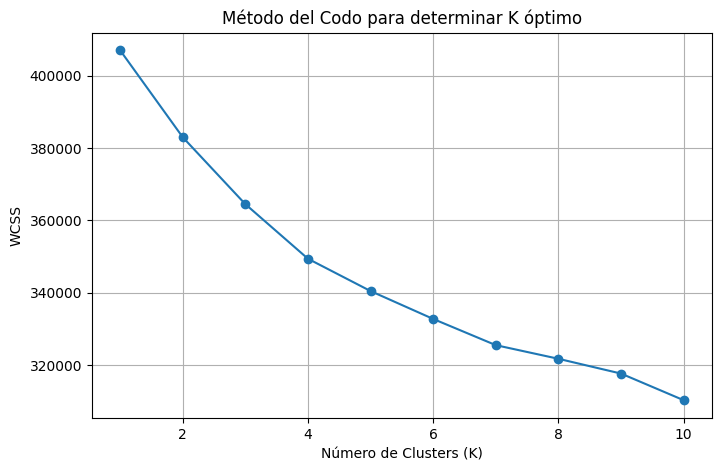

In [5]:
wcss = []


for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para determinar K óptimo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [6]:
wcss = []

print("K\tWCSS")
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    print(f"{k}\t{wcss[-1]:.2f}")

K	WCSS
1	407044.00
2	383001.63
3	364490.51
4	349396.27
5	340459.66
6	332749.26
7	325505.19
8	321736.44
9	317646.53
10	310284.82


### 1.B Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

## k means

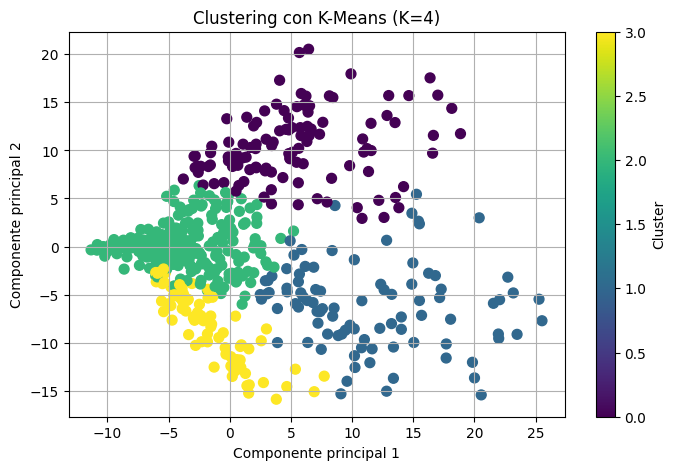

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('Clustering con K-Means (K=4)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

## Gaussian Mixture

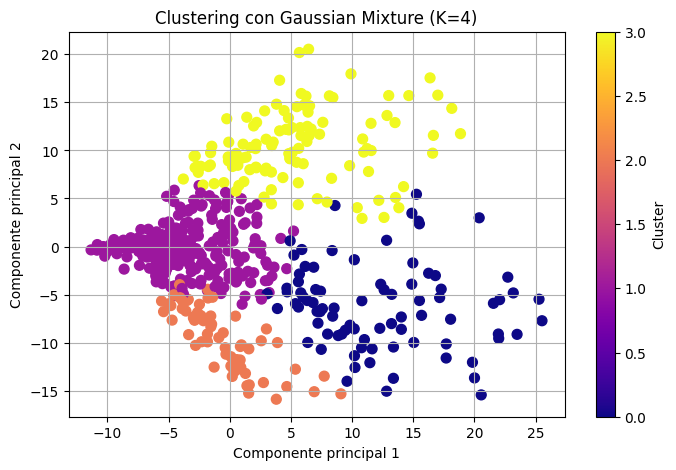

In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=0)
gmm_labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(8,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=gmm_labels, cmap='plasma', s=50)
plt.title('Clustering con Gaussian Mixture (K=4)')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

### Comparación (me dio curiosidad profe perdón)

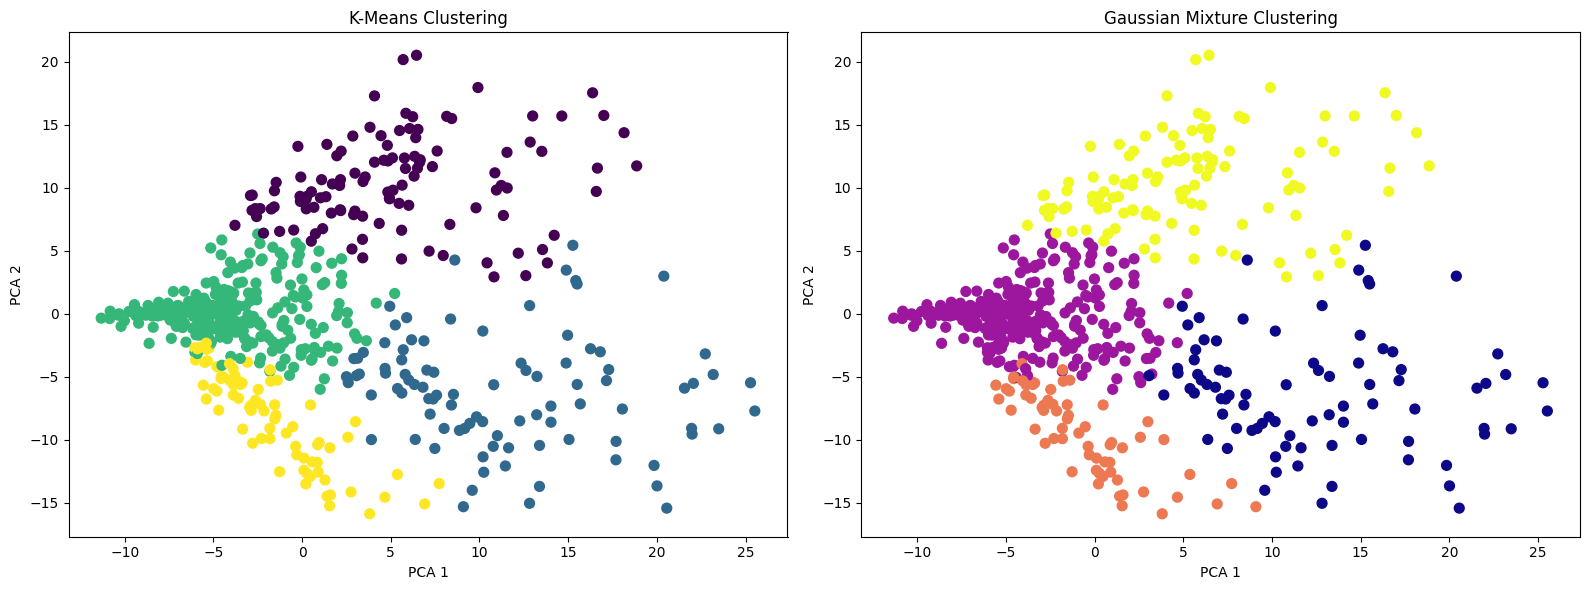

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', s=50)
axs[0].set_title('K-Means Clustering')
axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')

axs[1].scatter(X_pca[:,0], X_pca[:,1], c=gmm_labels, cmap='plasma', s=50)
axs[1].set_title('Gaussian Mixture Clustering')
axs[1].set_xlabel('PCA 1')
axs[1].set_ylabel('PCA 2')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.metrics import silhouette_score

sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
sil_gmm = silhouette_score(X_scaled, gmm_labels)

print(f"Silhouette Score - KMeans: {sil_kmeans:.4f}")
print(f"Silhouette Score - GMM:    {sil_gmm:.4f}")

Silhouette Score - KMeans: 0.0747
Silhouette Score - GMM:    0.0753


### Gaussian Mixture agrupó un poquitito mejor los datos :D

## 2. Dataser de Brain Tumor

### 2.A Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)

In [11]:
import pandas as pd

df = pd.read_csv("Brain Tumor (1).csv")

print(df.head())

print(df.describe())

    Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e

In [12]:
from sklearn.preprocessing import StandardScaler

df_numeric = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

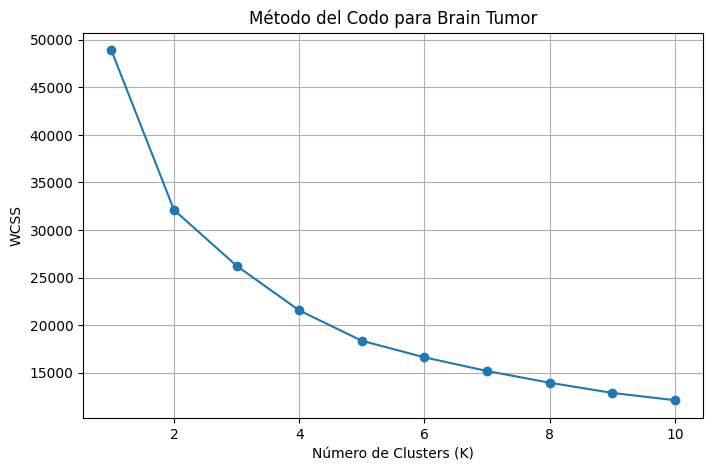

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo para Brain Tumor')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### 2.B Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth

In [14]:
import pandas as pd

df = pd.read_csv("Brain Tumor (1).csv")

print(df.head())

print(df['Class'].value_counts())

df_numeric = df.select_dtypes(include=['float64', 'int64'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

    Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e

## K-means

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

## GMM

In [16]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X_scaled)

## Clustering Jerárquico

In [17]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

## Matrices de confusión

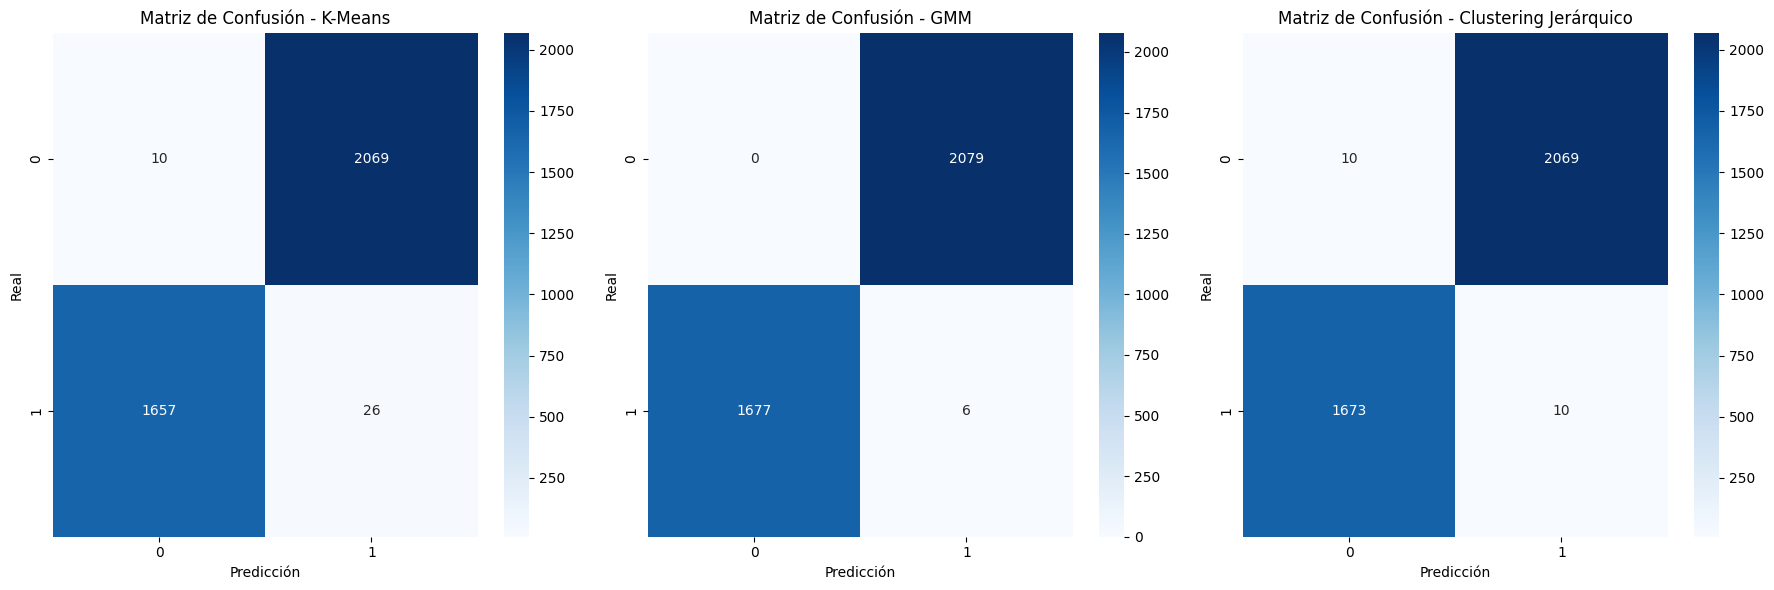

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = df['Class']

# K-Means
cm_kmeans = confusion_matrix(y_true, kmeans_labels)
# GMM
cm_gmm = confusion_matrix(y_true, gmm_labels)
# Clustering Jerárquico
cm_hierarchical = confusion_matrix(y_true, hierarchical_labels)


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# K-Means
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Matriz de Confusión - K-Means')
axs[0].set_xlabel('Predicción')
axs[0].set_ylabel('Real')

# GMM
sns.heatmap(cm_gmm, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_title('Matriz de Confusión - GMM')
axs[1].set_xlabel('Predicción')
axs[1].set_ylabel('Real')

# Clustering Jerárquico
sns.heatmap(cm_hierarchical, annot=True, fmt='d', cmap='Blues', ax=axs[2])
axs[2].set_title('Matriz de Confusión - Clustering Jerárquico')
axs[2].set_xlabel('Predicción')
axs[2].set_ylabel('Real')

plt.tight_layout()
plt.show()

### 2.C ¿Qué método recomendarías para este dataset?, ¿por qué?

### Para este dataset, recomendaría usar el método de Gaussian Mixture, ya que ofrece mayor flexibilidad para modelar los clusters con formas complejas. Además, la capacidad de asignar probabilidades de pertenencia es de utilidad para poder entender la incertidumbre en las predicciones. Aunque K-Means es más rápido y escalable, GMM es más adecuado para este tipo de datos, donde las distribuciones no necesariamente son esféricas.

## De su previa investigación:

### ¿Qué es precision?
La precisión es la proporción de predicciones positivas correctas entre todas las predicciones positivas realizadas por el modelo.

Fórmula:

Precision= TP/(TP+FP)

Donde:

TP (True Positives): Verdaderos positivos (predicciones correctas de la clase positiva).

FP (False Positives): Falsos positivos (predicciones incorrectas de la clase positiva).

La precisión responde a la pregunta: De todas las veces que el modelo predijo que algo era positivo, cuántas veces realmente lo fue? Es útil cuando el costo de un falso positivo es alto.

### ¿Qué es accuracy?

Es la proporción de predicciones correctas sobre todas las predicciones realizadas (tanto positivas como negativas).

Fórmula:

Accuracy= (TP+TN)/(TP+TN+FP+FN)
Donde:

TN (True Negatives): Verdaderos negativos (predicciones correctas de la clase negativa).

FN (False Negatives): Falsos negativos (predicciones incorrectas de la clase negativa).

La exactitud responde a la pregunta: ¿Qué tan bien está funcionando el modelo en general? Sin embargo, en datasets desbalanceados, puede ser engañosa si una de las clases es mucho más frecuente que la otra.

### ¿Qué es recall?

Es la proporción de predicciones positivas correctas entre todos los casos que son realmente positivos. Mide qué tan bien el modelo captura todos los positivos verdaderos.

Fórmula:

Recall= TP/(TP+FN)

Donde:

TP (True Positives): Verdaderos positivos.

FN (False Negatives): Falsos negativos.

El recall responde a la pregunta: ¿De todos los elementos que realmente son positivos, cuántos el modelo logró identificar? Es crucial cuando los falsos negativos tienen un alto costo (por ejemplo, en el diagnóstico de enfermedades).

### ¿Qué es f1-score?

Es la media armónica entre la precisión y el recall. Es una métrica que combina tanto la precisión como el recall, y se utiliza cuando necesitas un equilibrio entre ambos.

Fórmula:

F1=2⋅(Precision⋅Recall)/(Precision+Recall)


El F1-score es útil cuando hay un desequilibrio entre clases y cuando tanto los falsos positivos como los falsos negativos son importantes. Un F1-score más alto significa que el modelo tiene un buen equilibrio entre precisión y recall.

## 4. ¿Cómo se relacionan las definiciones anteriores a la matriz de confusión?

La matriz de confusión es una herramienta clave en clasificación que nos permite ver las predicciones de un modelo de manera detallada, mostrando cuántos ejemplos fueron clasificados correctamente y cuántos fueron incorrectos. Se organiza en una tabla de 2x2 (en clasificación binaria), donde cada celda representa:

TP (True Positives): Casos correctamente clasificados como positivos.

TN (True Negatives): Casos correctamente clasificados como negativos.

FP (False Positives): Casos incorrectamente clasificados como positivos.

FN (False Negatives): Casos incorrectamente clasificados como negativos.

## Relación

- La precisión nos dice, de todas las predicciones positivas realizadas por el modelo, cuántas realmente eran correctas. Si un modelo clasifica muchas veces ejemplos negativos como positivos (FP), la precisión será baja.

- La exactitud nos da una idea general de cuántas predicciones fueron correctas en comparación con el total de predicciones, tanto para clases positivas como negativas.

- El recall nos dice, de todas las instancias realmente positivas (que están en la fila de "Real Positiva"), cuántas fueron correctamente identificadas como positivas por el modelo. Si el modelo pierde muchas instancias positivas y las clasifica incorrectamente como negativas (FN), el recall será bajo.

- El F1-Score toma en cuenta tanto los TP como los FP y FN. Un F1-score alto indica que el modelo tiene un buen equilibrio entre precisión y recall. Si el modelo clasifica muchos negativos como positivos (FP) o muchos positivos como negativos (FN), el F1-score será bajo.

## Entonces:

- Precision: Depende de la cantidad de TP y FP.

- Accuracy: Depende de todos los valores en la matriz de confusión (TP, TN, FP, FN).

- Recall: Depende de la cantidad de TP y FN.

- F1-Score: Es una combinación de Precision y Recall.

## 5. A partir del resultado de 2.B, calcular precision, accuracy, recall y f1-score

In [19]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.stats import mode
import numpy as np

# Ajustar etiquetas
def ajustar_labels(y_true, y_pred):

    labels = np.zeros_like(y_pred)
    for i in [0, 1]:
        mask = (y_pred == i)
        if np.any(mask):
            labels[mask] = mode(y_true[mask])[0]
    return labels


kmeans_labels_ajustado = ajustar_labels(y_true, kmeans_labels)
gmm_labels_ajustado = ajustar_labels(y_true, gmm_labels)
hierarchical_labels_ajustado = ajustar_labels(y_true, hierarchical_labels)

# K-Means
print("----- K-Means -----")
print("Accuracy:", accuracy_score(y_true, kmeans_labels_ajustado))
print(classification_report(y_true, kmeans_labels_ajustado, digits=4))

# GMM
print("----- Gaussian Mixture -----")
print("Accuracy:", accuracy_score(y_true, gmm_labels_ajustado))
print(classification_report(y_true, gmm_labels_ajustado, digits=4))

# Clustering Jerárquico
print("----- Clustering Jerárquico -----")
print("Accuracy:", accuracy_score(y_true, hierarchical_labels_ajustado))
print(classification_report(y_true, hierarchical_labels_ajustado, digits=4))

----- K-Means -----
Accuracy: 0.9904306220095693
              precision    recall  f1-score   support

           0     0.9876    0.9952    0.9914      2079
           1     0.9940    0.9846    0.9893      1683

    accuracy                         0.9904      3762
   macro avg     0.9908    0.9899    0.9903      3762
weighted avg     0.9905    0.9904    0.9904      3762

----- Gaussian Mixture -----
Accuracy: 0.9984051036682615
              precision    recall  f1-score   support

           0     0.9971    1.0000    0.9986      2079
           1     1.0000    0.9964    0.9982      1683

    accuracy                         0.9984      3762
   macro avg     0.9986    0.9982    0.9984      3762
weighted avg     0.9984    0.9984    0.9984      3762

----- Clustering Jerárquico -----
Accuracy: 0.9946836788942052
              precision    recall  f1-score   support

           0     0.9952    0.9952    0.9952      2079
           1     0.9941    0.9941    0.9941      1683

    accuracy